In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.serif'] = "cm"

# Load Data

In [3]:
data_path = '/Users/christopherwmurphy/Documents/projects/lhc_olympics/LHC-Olympics-2020/data_processed'

In [4]:
df = pd.read_hdf(os.path.join(data_path, 'processed_labeled.h5'), key='processed')

In [5]:
df.head()

,pt_1,eta_1,phi_1,mass_1,pt_2,eta_2,phi_2,mass_2,sqrt(tau1(2))/tau1(1)_1,tau21_1,...,tau32_2,tau43_2,multiplicity_2,fragmentation_2,is_signal,delta_phi_jj,delta_R_jj,mass_jj,mass_1+mass_2,|mass_1-mass_2|
0,1253.298003,-1.478242,-0.297146,42.716788,1185.433084,-0.827221,2.861084,185.553204,1.622928,0.649566,...,1.009936,0.805878,69,0.364160,0,3.124955,3.192049,2584.015743,228.269992,142.836417
1,1373.712376,0.325336,-2.726861,87.195634,1095.236704,-1.525242,0.270007,81.336205,1.301535,0.557472,...,1.173151,0.879477,29,0.502177,0,2.996868,3.522195,3584.580631,168.531840,5.859429
2,1315.489293,0.177558,-0.905915,99.671886,1270.862559,-1.398176,2.249104,467.081756,1.242282,0.209455,...,0.487137,0.811404,110,0.190413,1,3.128166,3.502622,3546.286399,566.753642,367.409870
3,1459.852953,-0.856913,-2.072205,301.151370,1261.442473,1.310571,1.050000,311.064078,1.778033,0.806421,...,0.626306,0.863253,56,0.331747,0,3.122205,3.800809,4583.701785,612.215448,9.912708
4,1229.394261,0.094365,1.287631,44.123101,1190.990800,-0.333867,-1.850979,64.459632,1.739064,0.689573,...,0.857767,0.616520,26,0.293120,0,3.138610,3.167689,2478.359177,108.582734,20.336531


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099809 entries, 0 to 1099808
Data columns (total 26 columns):
pt_1                       1099809 non-null float64
eta_1                      1099809 non-null float64
phi_1                      1099809 non-null float64
mass_1                     1099809 non-null float64
pt_2                       1099809 non-null float64
eta_2                      1099809 non-null float64
phi_2                      1099809 non-null float64
mass_2                     1099809 non-null float64
sqrt(tau1(2))/tau1(1)_1    1099809 non-null float64
tau21_1                    1099809 non-null float64
tau32_1                    1099809 non-null float64
tau43_1                    1099809 non-null float64
multiplicity_1             1099809 non-null int64
fragmentation_1            1099809 non-null float64
sqrt(tau1(2))/tau1(1)_2    1099809 non-null float64
tau21_2                    1099809 non-null float64
tau32_2                    1099809 non-null float64
tau43

In [7]:
df.corr()['is_signal'].sort_values()

tau21_1                   -0.298817
tau21_2                   -0.289988
sqrt(tau1(2))/tau1(1)_1   -0.240809
sqrt(tau1(2))/tau1(1)_2   -0.226144
tau32_1                   -0.145340
tau32_2                   -0.134612
tau43_1                   -0.079372
tau43_2                   -0.074645
multiplicity_2            -0.063775
fragmentation_1           -0.062089
multiplicity_1            -0.060035
fragmentation_2           -0.045187
delta_R_jj                -0.044554
phi_2                     -0.001589
eta_2                     -0.001033
phi_1                     -0.000562
eta_1                      0.002800
delta_phi_jj               0.075458
mass_jj                    0.139062
mass_1                     0.203612
mass_2                     0.206523
pt_1                       0.274927
pt_2                       0.289461
mass_1+mass_2              0.294259
|mass_1-mass_2|            0.392805
is_signal                  1.000000
Name: is_signal, dtype: float64

# Plot Features

## Masses

With a bump this large no machine learning is necessary

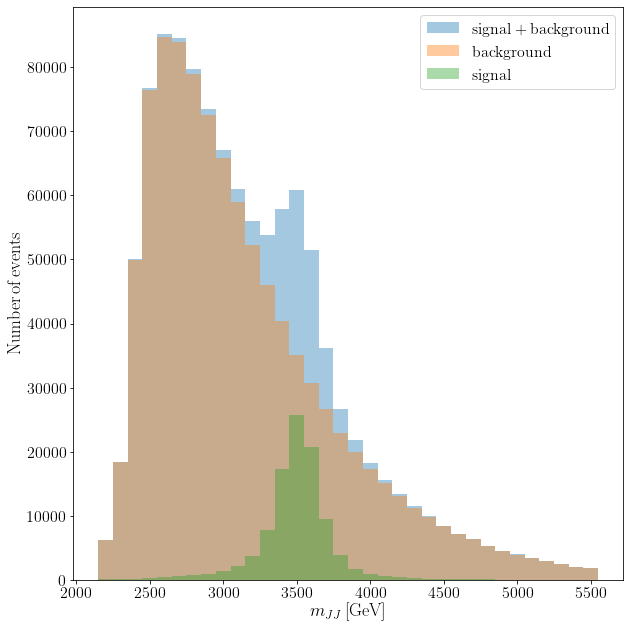

In [8]:
plt.figure(1, figsize=(9, 9))

plt.hist(df['mass_jj'], bins=np.arange(2150, 5650, 100), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['mass_jj'], bins=np.arange(2150, 5650, 100), alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['mass_jj'], bins=np.arange(2150, 5650, 100), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$m_{JJ}\, \rm [GeV]$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend(loc='upper right')

plt.tight_layout(True)
plt.show()

Jets are sorted by $p_T$, so sometimes the heavier jet is $j_2$

In [9]:
image_dir = '/Users/christopherwmurphy/Documents/projects/lhc_olympics/LHC-Olympics-2020/images'

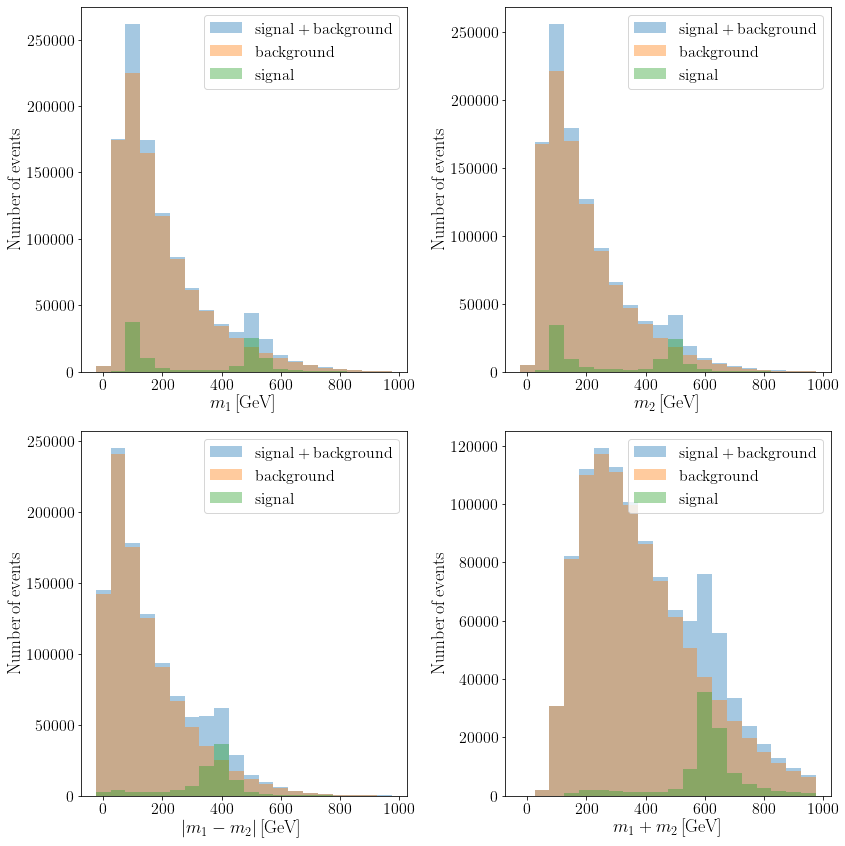

In [10]:
plt.figure(7, figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(df['mass_1'], bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['mass_1'], bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['mass_1'], bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$m_1\, \rm [GeV]$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend(loc='upper right')

plt.subplot(2, 2, 2)
plt.hist(df['mass_2'], bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['mass_2'], bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['mass_2'], bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$m_2\, \rm [GeV]$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend(loc='upper right')

plt.subplot(2, 2, 3)
plt.hist(np.abs(df['mass_1'] - df['mass_2']), bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(np.abs(df[df['is_signal'] == 0]['mass_1'] - df[df['is_signal'] == 0]['mass_2']), bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm background$')
plt.hist(np.abs(df[df['is_signal'] == 1]['mass_1'] - df[df['is_signal'] == 1]['mass_2']), bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$|m_1 - m_2|\, \rm [GeV]$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend(loc='upper right')

plt.subplot(2, 2, 4)
plt.hist(df['mass_1'] + df['mass_2'], bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['mass_1'] + df[df['is_signal'] == 0]['mass_2'], bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['mass_1'] + df[df['is_signal'] == 1]['mass_2'], bins=np.arange(-25, 1025, 50), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$m_1 + m_2\, \rm [GeV]$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend(loc='upper right')

plt.tight_layout(True)
plt.savefig(os.path.join(image_dir, 'masses.png'))
plt.show()

## $p_T$

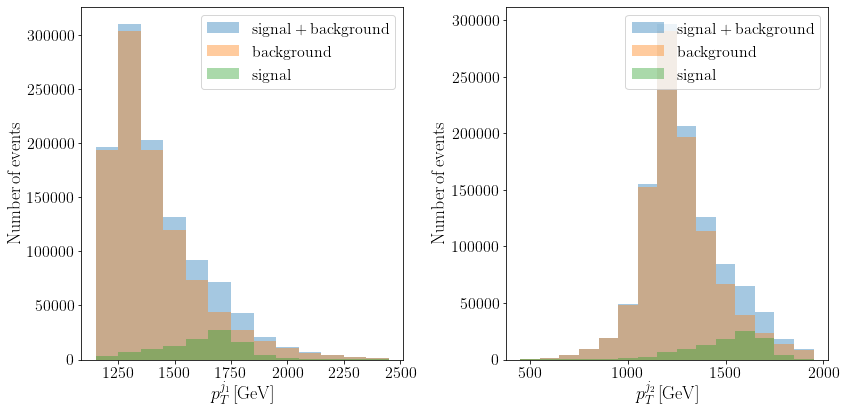

In [10]:
plt.figure(2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['pt_1'], bins=np.arange(1150, 2550, 100), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['pt_1'], bins=np.arange(1150, 2550, 100), alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['pt_1'], bins=np.arange(1150, 2550, 100), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$p_T^{j_1}\, \rm [GeV]$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['pt_2'], bins=np.arange(450, 2050, 100), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['pt_2'], bins=np.arange(450, 2050, 100), alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['pt_2'], bins=np.arange(450, 2050, 100), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$p_T^{j_2}\, \rm [GeV]$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.tight_layout(True)
plt.show()

## $\eta$, $\phi$

The pseudorapidity may have a small amount of discriminating power

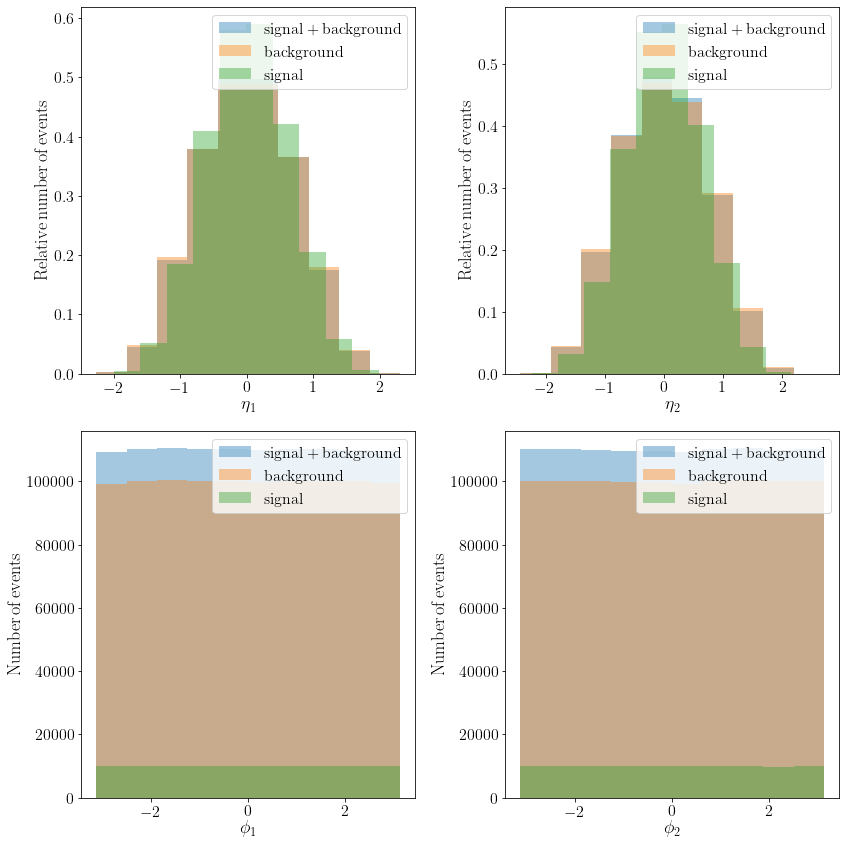

In [23]:
plt.figure(3, figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(df['eta_1'], alpha=0.4, density=True, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['eta_1'], alpha=0.4, density=True, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['eta_1'], alpha=0.4, density=True, label=r'$\rm signal$')
plt.xlabel(r'$\eta_1$')
plt.ylabel(r'$\rm Relative\, number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df['eta_2'], alpha=0.4, density=True, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['eta_2'], alpha=0.4, density=True, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['eta_2'], alpha=0.4, density=True, label=r'$\rm signal$')
plt.xlabel(r'$\eta_2$')
plt.ylabel(r'$\rm Relative\, number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df['phi_1'], alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['phi_1'], alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['phi_1'], alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$\phi_1$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(df['phi_2'], alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['phi_2'], alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['phi_2'], alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$\phi_2$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.tight_layout(True)
plt.show()

## $N$-subjetiness

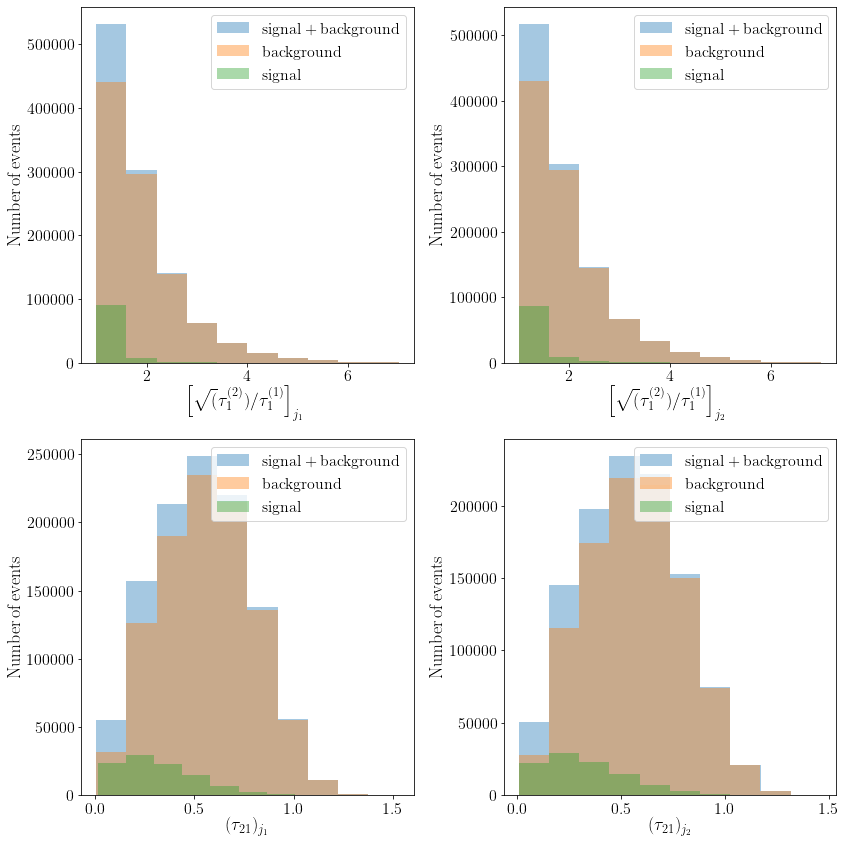

In [17]:
plt.figure(4, figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(df['sqrt(tau1(2))/tau1(1)_1'], range=(1, 7), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['sqrt(tau1(2))/tau1(1)_1'], range=(1, 7), alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['sqrt(tau1(2))/tau1(1)_1'], range=(1, 7), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$\left[\sqrt(\tau_1^{(2)})/\tau_1^{(1)}\right]_{j_1}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df['sqrt(tau1(2))/tau1(1)_2'], range=(1, 7), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['sqrt(tau1(2))/tau1(1)_2'], range=(1, 7), alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['sqrt(tau1(2))/tau1(1)_2'], range=(1, 7), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$\left[\sqrt(\tau_1^{(2)})/\tau_1^{(1)}\right]_{j_2}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df['tau21_1'], alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['tau21_1'], alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['tau21_1'], alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$(\tau_{21})_{j_1}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(df['tau21_2'], alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['tau21_2'], alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['tau21_2'], alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$(\tau_{21})_{j_2}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.tight_layout(True)
plt.show()

Each of the lighter exotic particles decays to dijets, so it makes sense that the $n$-subjetiness observables with higher $n$ are less effective discriminators

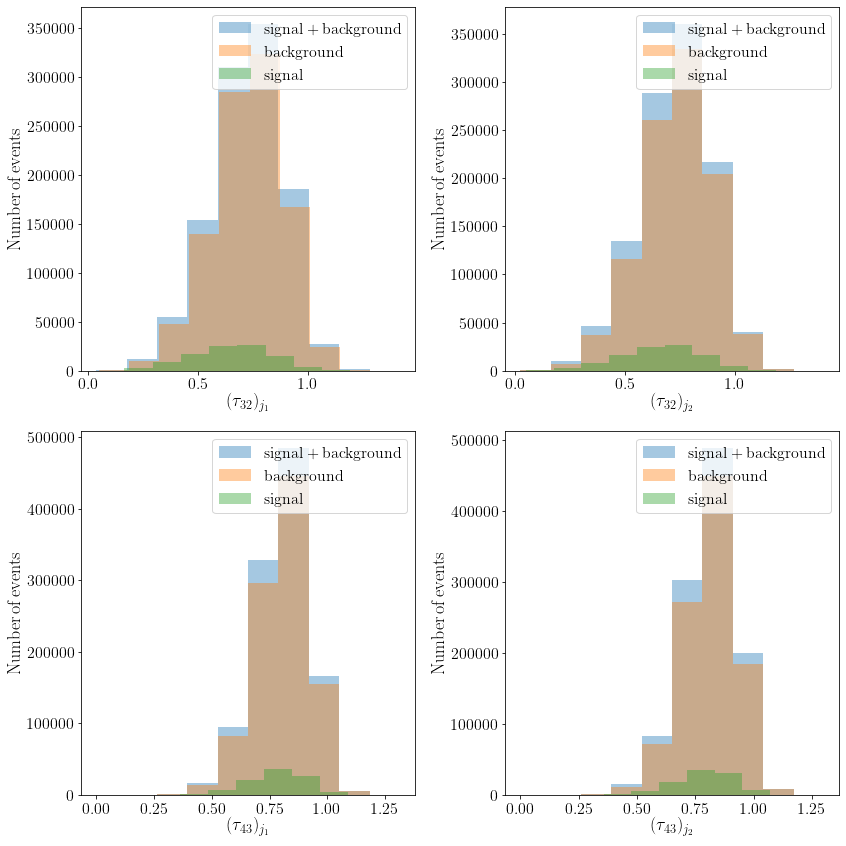

In [18]:
plt.figure(5, figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(df['tau32_1'], alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['tau32_1'], alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['tau32_1'], alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$(\tau_{32})_{j_1}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df['tau32_2'], alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['tau32_2'], alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['tau32_2'], alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$(\tau_{32})_{j_2}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df['tau43_1'], alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['tau43_1'], alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['tau43_1'], alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$(\tau_{43})_{j_1}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(df['tau43_2'], alpha=0.4, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['tau43_2'], alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['tau43_2'], alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$(\tau_{43})_{j_2}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.tight_layout(True)
plt.show()

## Quark / Gluon discrimination

Here the background is more likely to be outlying. This is not useful for outlier detection, but could be useful for classification

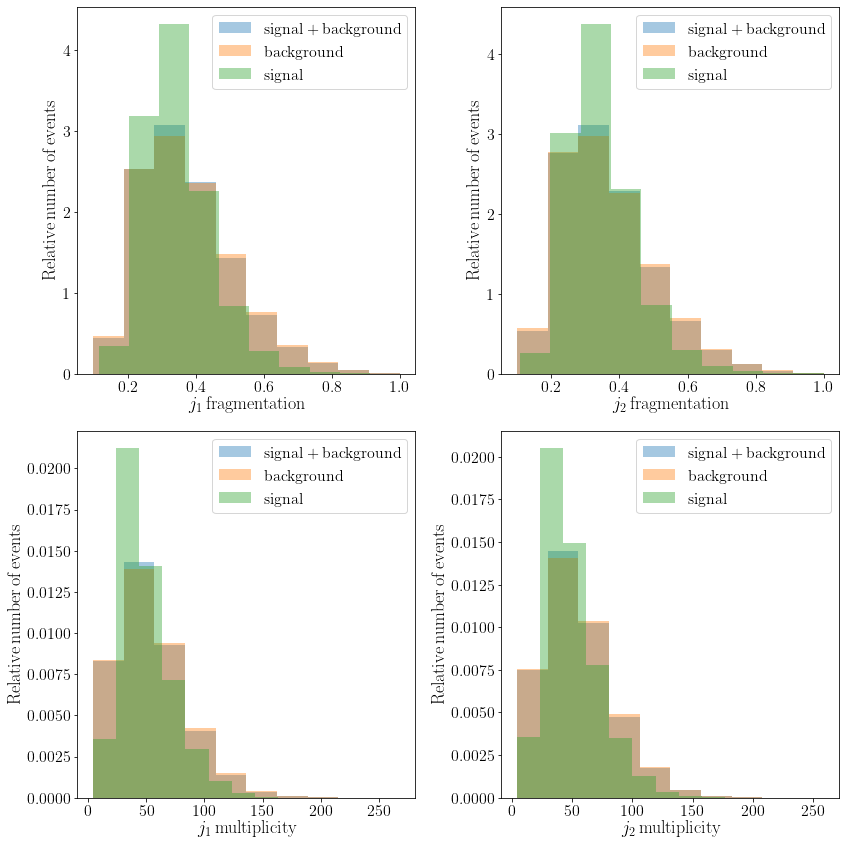

In [24]:
plt.figure(6, figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(df['fragmentation_1'], alpha=0.4, density=True, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['fragmentation_1'], density=True, alpha=0.4, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['fragmentation_1'], density=True, alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$j_1 \, \rm fragmentation$')
plt.ylabel(r'$\rm Relative\, number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df['fragmentation_2'], alpha=0.4, density=True, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['fragmentation_2'], alpha=0.4, density=True, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['fragmentation_2'], alpha=0.4, density=True, label=r'$\rm signal$')
plt.xlabel(r'$j_2 \, \rm fragmentation$')
plt.ylabel(r'$\rm Relative\, number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(df['multiplicity_1'], alpha=0.4, density=True, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['multiplicity_1'], alpha=0.4, density=True, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['multiplicity_1'], alpha=0.4, density=True, label=r'$\rm signal$')
plt.xlabel(r'$j_1 \, \rm multiplicity$')
plt.ylabel(r'$\rm Relative\, number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(df['multiplicity_2'], alpha=0.4, density=True, label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['multiplicity_2'], alpha=0.4, density=True, label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['multiplicity_2'], alpha=0.4, density=True, label=r'$\rm signal$')
plt.xlabel(r'$j_2 \, \rm multiplicity$')
plt.ylabel(r'$\rm Relative\, number\, of\, events$')
plt.legend()

plt.tight_layout(True)
plt.show()

## Dijet Observables

Again, the signal is not outlying here

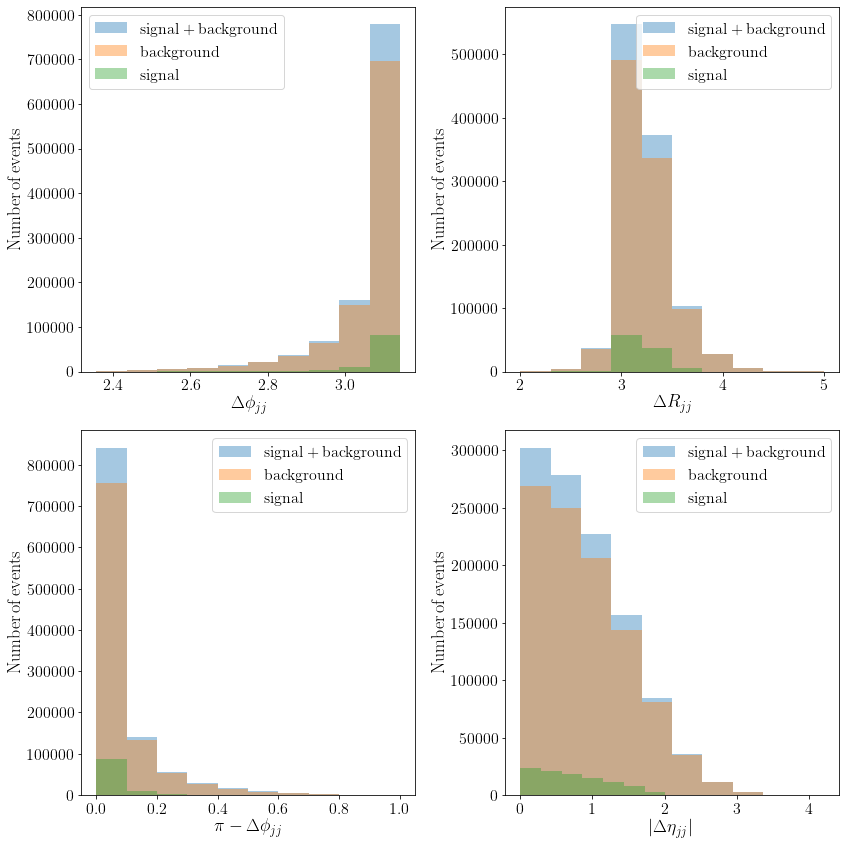

In [40]:
plt.figure(8, figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(df['delta_phi_jj'], alpha=0.4, range=(3*np.pi/4, np.pi), label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['delta_phi_jj'], alpha=0.4, range=(3*np.pi/4, np.pi), label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['delta_phi_jj'], alpha=0.4, range=(3*np.pi/4, np.pi), label=r'$\rm signal$')
plt.xlabel(r'$\Delta\phi_{jj}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(df['delta_R_jj'], alpha=0.4, range=(2.0, 5.0), label=r'$\rm signal+background$')
plt.hist(df[df['is_signal'] == 0]['delta_R_jj'], alpha=0.4, range=(2.0, 5.0), label=r'$\rm background$')
plt.hist(df[df['is_signal'] == 1]['delta_R_jj'], alpha=0.4, range=(2.0, 5.0), label=r'$\rm signal$')
plt.xlabel(r'$\Delta R_{jj}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(np.pi - df['delta_phi_jj'], alpha=0.4, range=(0, 1), label=r'$\rm signal+background$')
plt.hist(np.pi - df[df['is_signal'] == 0]['delta_phi_jj'], range=(0, 1), alpha=0.4, label=r'$\rm background$')
plt.hist(np.pi - df[df['is_signal'] == 1]['delta_phi_jj'], range=(0, 1), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$\pi - \Delta\phi_{jj}$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(np.sqrt(df['delta_R_jj']**2 - df['delta_phi_jj']**2), alpha=0.4, label=r'$\rm signal+background$')
plt.hist(np.sqrt(df[df['is_signal'] == 0]['delta_R_jj']**2 - df[df['is_signal'] == 0]['delta_phi_jj']**2), alpha=0.4, label=r'$\rm background$')
plt.hist(np.sqrt(df[df['is_signal'] == 1]['delta_R_jj']**2 - df[df['is_signal'] == 1]['delta_phi_jj']**2), alpha=0.4, label=r'$\rm signal$')
plt.xlabel(r'$|\Delta\eta_{jj}|$')
plt.ylabel(r'$\rm Number\, of\, events$')
plt.legend()

plt.tight_layout(True)
plt.show()